# Plot CSB results and compare to experiment

In [49]:
%%writefile csb.dat
# inter    & spin   &   T &  YN  &   NN &  pert &  full    \\     
\hline
NLO13(500) & 0      &  44 &  200 &   16 &  261 &   265(14) \\
NLO13(550) & 0      &  46 &  191 &   20 &  257 &   261(14) \\
NLO13(600) & 0      &  44 &  187 &   20 &  252 &   256(14) \\
NLO13(650) & 0      &  38 &  189 &   18 &  245 &   249(14) \\
\hline
NLO19(500) & 0      &  14 &  224 &    5 &  243 &   249(14) \\
NLO19(550) & 0      &  14 &  226 &    7 &  247 &   252(14) \\
NLO19(600) & 0      &  22 &  204 &   12 &  238 &   243(14) \\
NLO19(650) & 0      &  26 &  207 &   12 &  245 &   250(14) \\
\hline
NLO13(500) & 1      &   5 &  -90 &   15 &  -71 &   -66(14) \\
NLO13(550) & 1      &   5 &  -86 &   18 &  -63 &   -56(14) \\
NLO13(600) & 1      &   4 &  -83 &   19 &  -59 &   -53(14) \\
NLO13(650) & 1      &   3 &  -80 &   17 &  -59 &   -55(14) \\
\hline
NLO19(500) & 1      &   1 &  -84 &    3 &  -80 &   -75(14) \\
NLO19(550) & 1      &   2 &  -81 &    2 &  -77 &   -72(14) \\
NLO19(600) & 1      &   4 &  -82 &    6 &  -71 &   -67(14) \\
NLO19(650) & 1      &   4 &  -79 &    9 &  -66 &   -69(14) \\
\hline


Overwriting csb.dat


In [50]:
import re 
# script for reading fractions and converting to float (from stackexchange)
def convert_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        num, denom = frac_str.split('/')
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac
    
    
# script for reading fractions and converting to float (from stackexchange)
def convert_to_floaterr(errstr):
    try:
        value=float(errstr)
        errvalue=0.0   # without error return 0.0 error 
    except ValueError:
        regexpr=re.search(r"(.*)\(.*\)",errstr)
        valuestr=regexpr.group(1)
        value=float(valuestr)
        regexpr=re.search(r".*\((.*)\)",errstr)
        errvaluestr=regexpr.group(1)
        tempstr = re.sub(r'\d', '0',   valuestr) 
        errvaluestr=tempstr[:-len(errvaluestr)]+errvaluestr
        errvalue=float(errvaluestr)
    return value,errvalue     
    


In [51]:
import pandas as pd
import re 

def read_csb_energies(infilename):
    """Reads in tables of 4-body CSB energies in latex format and returns a pandas dataframe including the 
       CSB, its components and the uncertainty.
    """
    
# prepare an empty dataframe for all results 
    resdf=pd.DataFrame()

# open file with latex tables 
    infile=open(infilename,"r")

# get from each relevant line the set of data 
    for line in infile:
      if "NLO" in line: 
       data = line.rstrip('\n').rstrip('\\').split("&") 
    
       regexpr=re.search(r".*\((.*)\)",data[0])
       cutval=int(regexpr.group(1))

       regexpr=re.search(r"(.*)\(.*\)",data[0])
       order=regexpr.group(1)
               
       jtot=convert_to_float(data[1])
       tcsb=convert_to_float(data[2])
       vyncsb=convert_to_float(data[3])
       vnncsb=convert_to_float(data[4])
       csbpert=convert_to_float(data[5])
       ecsb,deltaecsb=convert_to_floaterr(data[6])
        
       linedict={
        "cutoff":cutval,
        "order":order,  
        "jtot":jtot,  
        "ecsb":ecsb,
        "tcsb":tcsb,
        "vyncsb":vyncsb,
        "vnncsb":vnncsb,
        "csbpert":csbpert,
        "deltaecsb":deltaecsb,
             }
    
       resdf=resdf.append(linedict,ignore_index=True)    
    
    infile.close()    
    
    return resdf

In [52]:
resdf=read_csb_energies("csb.dat")
resdf

cutoff  order  jtot   ecsb  tcsb  vyncsb  vnncsb  csbpert  deltaecsb
0    500.0  NLO13   0.0  265.0  44.0   200.0    16.0    261.0       14.0
1    550.0  NLO13   0.0  261.0  46.0   191.0    20.0    257.0       14.0
2    600.0  NLO13   0.0  256.0  44.0   187.0    20.0    252.0       14.0
3    650.0  NLO13   0.0  249.0  38.0   189.0    18.0    245.0       14.0
4    500.0  NLO19   0.0  249.0  14.0   224.0     5.0    243.0       14.0
5    550.0  NLO19   0.0  252.0  14.0   226.0     7.0    247.0       14.0
6    600.0  NLO19   0.0  243.0  22.0   204.0    12.0    238.0       14.0
7    650.0  NLO19   0.0  250.0  26.0   207.0    12.0    245.0       14.0
8    500.0  NLO13   1.0  -66.0   5.0   -90.0    15.0    -71.0      -14.0
9    550.0  NLO13   1.0  -56.0   5.0   -86.0    18.0    -63.0      -14.0
10   600.0  NLO13   1.0  -53.0   4.0   -83.0    19.0    -59.0      -14.0
11   650.0  NLO13   1.0  -55.0   3.0   -80.0    17.0    -59.0      -14.0
12   500.0  NLO19   1.0  -75.0   1.0   -84.0     3.0    -80.0      -14.0
13   550.0  NLO19   1.0  -72.0   2.0   -81.0     2.0    -77.0      -14.0
14   600.0  NLO19   1.0  -67.0   4.0   -82.0     6.0    -71.0      -14.0
15   650.0  NLO19   1.0  -69.0   4.0   -79.0     9.0    -66.0      -14.0

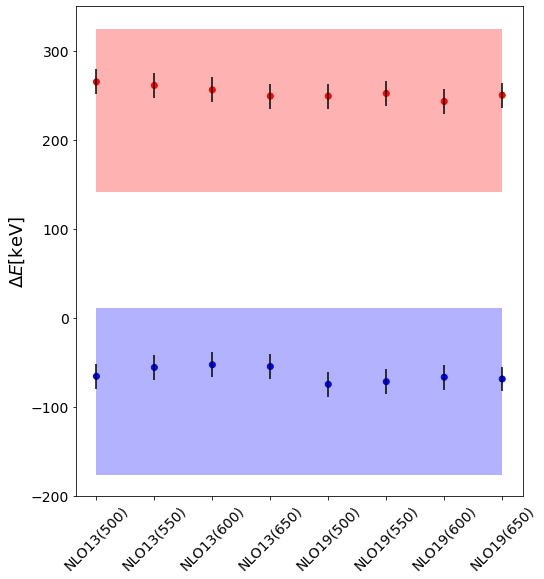

In [135]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

orderdict={"NLO13":0,"NLO19":1}
cutoffdict={500:0,550:1,600:2,650:3}
colordict={0:"r",1:"b"}
markerdict={0:"o",1:"D"}

ordernames=["NLO13","NLO19"]
cutoffnames=["500","550","600","650"]

# determine x offset from order and cutoff

xoffset = [ orderdict[order]*4+cutoffdict[cutoff] for order, cutoff in zip(resdf['order'], resdf['cutoff'])]
resdf["xoffset"]=xoffset
color = [ colordict[jtot] for jtot in resdf['jtot']]
marker = [ markerdict[jtot] for jtot in resdf['jtot']]
resdf["color"]=color
resdf["marker"]=marker

#orderdict[resdf.order]
fig, ax = plt.subplots(figsize=(8,9))

ax.errorbar(resdf.xoffset, resdf.ecsb,yerr=resdf.deltaecsb,fmt='o',markersize=0, color="black") # yerr is taken as the upper and lower error bound 
ax.scatter(resdf.xoffset, resdf.ecsb,color=resdf.color,marker="o")

ax.set_xticks(range(8))
ax.set_xticklabels([ ordernames[n//4]+"({0:s})".format(cutoffnames[n%4]) for n in range(8)])

ax.set_ylabel(r"$\Delta E$[keV]",fontsize=18)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(rotation=0,fontsize=14)


# add current experiment in terms of a band 
exp0p=233
exp0perr=92
exp1p=-83
exp1perr=94
# 0p experiment
ax.add_patch(Rectangle((0,exp0p-exp0perr), 7, 2*exp0perr,alpha=0.3,facecolor="red"))
ax.add_patch(Rectangle((0,exp1p-exp1perr), 7, 2*exp1perr,alpha=0.3,facecolor="blue"))

ax.set_ylim([-200,350])
fig.savefig("csbvals.pdf")

In [91]:
resdf

cutoff  order  jtot   ecsb  tcsb  vyncsb  vnncsb  csbpert  deltaecsb  \
0    500.0  NLO13   0.0  265.0  44.0   200.0    16.0    261.0       14.0   
1    550.0  NLO13   0.0  261.0  46.0   191.0    20.0    257.0       14.0   
2    600.0  NLO13   0.0  256.0  44.0   187.0    20.0    252.0       14.0   
3    650.0  NLO13   0.0  249.0  38.0   189.0    18.0    245.0       14.0   
4    500.0  NLO19   0.0  249.0  14.0   224.0     5.0    243.0       14.0   
5    550.0  NLO19   0.0  252.0  14.0   226.0     7.0    247.0       14.0   
6    600.0  NLO19   0.0  243.0  22.0   204.0    12.0    238.0       14.0   
7    650.0  NLO19   0.0  250.0  26.0   207.0    12.0    245.0       14.0   
8    500.0  NLO13   1.0  -66.0   5.0   -90.0    15.0    -71.0      -14.0   
9    550.0  NLO13   1.0  -56.0   5.0   -86.0    18.0    -63.0      -14.0   
10   600.0  NLO13   1.0  -53.0   4.0   -83.0    19.0    -59.0      -14.0   
11   650.0  NLO13   1.0  -55.0   3.0   -80.0    17.0    -59.0      -14.0   
12   500.0  NLO19   1.0  -75.0   1.0   -84.0     3.0    -80.0      -14.0   
13   550.0  NLO19   1.0  -72.0   2.0   -81.0     2.0    -77.0      -14.0   
14   600.0  NLO19   1.0  -67.0   4.0   -82.0     6.0    -71.0      -14.0   
15   650.0  NLO19   1.0  -69.0   4.0   -79.0     9.0    -66.0      -14.0   

    xval  xoffset color marker  
0      0        0     r      o  
1      1        1     r      o  
2      2        2     r      o  
3      3        3     r      o  
4      4        4     r      o  
5      5        5     r      o  
6      6        6     r      o  
7      7        7     r      o  
8      0        0     b      ^  
9      1        1     b      ^  
10     2        2     b      ^  
11     3        3     b      ^  
12     4        4     b      ^  
13     5        5     b      ^  
14     6        6     b      ^  
15     7        7     b      ^

In [ ]:
# attempt of breakdown of csb values 

